#California Airbnb Data Analysis Project
Data Analytics Project - Spring 2024
Introduction

Welcome to our comprehensive Data Analytics project where we explore Airbnb listings across various Californian regions including Los Angeles, San Diego, San Francisco, San Mateo, Santa Clara, and Sacramento. Our analysis focuses on uncovering trends and deriving insights that could influence market strategies for Airbnb listings.

Kaggle dataset:
https://www.kaggle.com/datasets/konradb/inside-airbnb-usa

Project Goals:

* Sentiment Analysis: Examine how guest reviews influence Airbnb listings and decision-making processes.
* Price Modeling: Develop predictive models to determine listing prices based on factors such as location, amenities, and guest reviews.
* Market Impact: Assess the influence of Airbnb on local housing markets through time series analysis and predictive modeling using neural networks.

# Data Cleaning, EDA and Trend analysis


Data Preparation and Initial Analysis
Data Import and Cleaning

We begin by importing the necessary libraries and loading our datasets. Our data has been sourced from Kaggle and pre-loaded on this platform for convenience.

Let us first import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Merging and Preliminary Checks

Next, load in the datasets for different regions in California. We got this data from Kaggle, but for ease of access, we have already loaded in the datasets to Collab so you can just go ahead and run the cell!

After loading the data, we combine datasets from all regions to create a unified view of the Airbnb landscape in California.

In [ ]:
df_LA = pd.read_csv("LAlistings.csv")
df_SCl = pd.read_csv("SClalistings.csv")
df_SCr = pd.read_csv("SCrulistings.csv")
df_SD = pd.read_csv("SDlistings.csv")
df_SF = pd.read_csv("SFlistings.csv")
df_SM = pd.read_csv("SMlistings.csv")

Let’s combine all the data we have at our disposal for the state of California. Calculate the length of the rows to make sure we have well over 50,000 rows. This will give us the power to derive more meaningful insights. We will do cleaning on this dataset later on to make sure we still surpass the 50,000 row threshold.

In [ ]:
len(df_LA) + len(df_SCl)+len(df_SCr) + len(df_SD) + len(df_SF) + len(df_SM)

73662

Exploratory Data Analysis (EDA)
Handling Missing Data

We first identify and handle missing values to ensure the quality of our analysis.

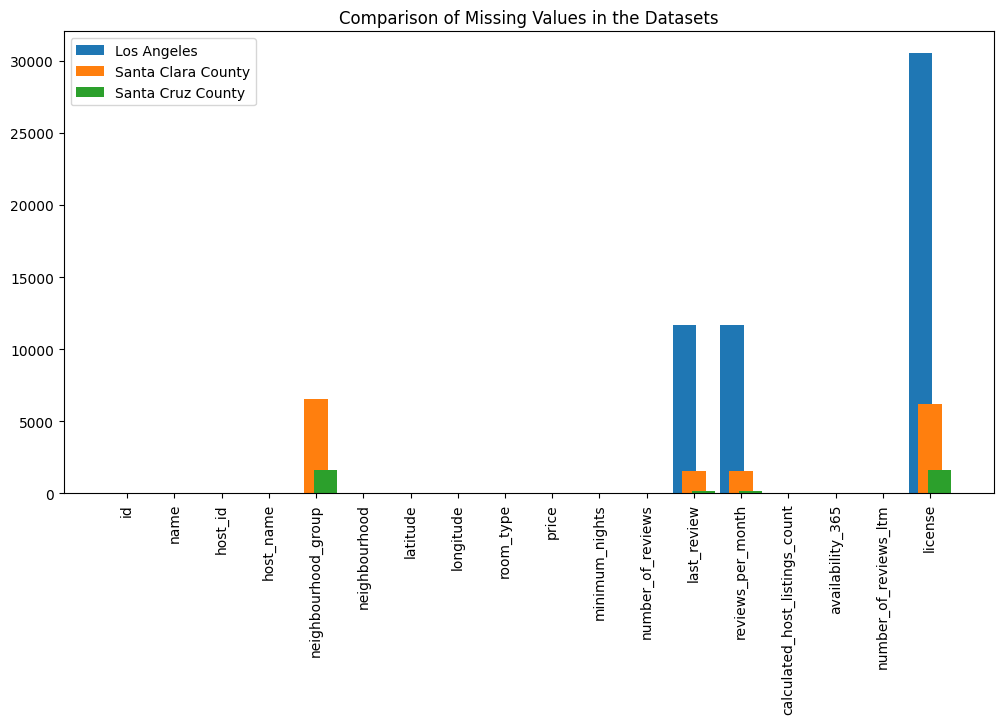

In [ ]:
missing_values_los = df_LA.isnull().sum()
missing_values_san = df_SCl.isnull().sum()
missing_values_bro = df_SCr.isnull().sum()

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(missing_values_los))
width = 0.5

ax.bar(x - 0.2, missing_values_los, width, label='Los Angeles')
ax.bar(x, missing_values_san, width, label='Santa Clara County')
ax.bar(x + 0.2, missing_values_bro, width, label='Santa Cruz County')

ax.set_xticks(x)
ax.set_xticklabels(df_LA.columns, rotation=90)
ax.set_title('Comparison of Missing Values in the Datasets')
ax.legend()

plt.show()

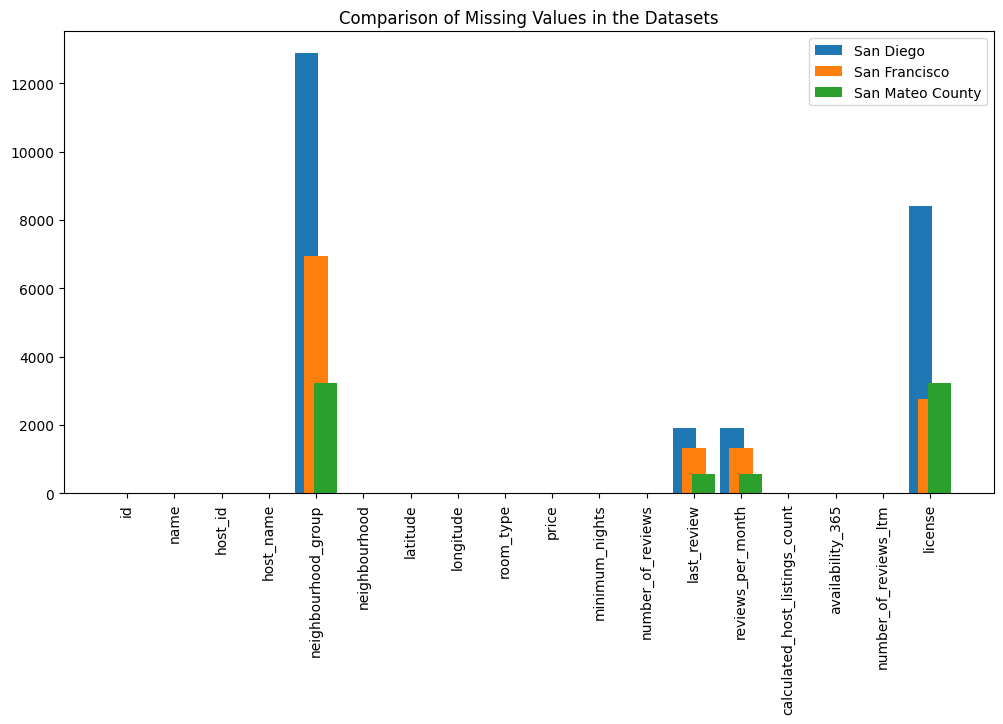

In [ ]:
missing_values_SD = df_SD.isnull().sum()
missing_values_SF = df_SF.isnull().sum()
missing_values_SM = df_SM.isnull().sum()

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(missing_values_SD))
width = 0.5

ax.bar(x - 0.2, missing_values_SD, width, label='San Diego')
ax.bar(x, missing_values_SF, width, label='San Francisco')
ax.bar(x + 0.2, missing_values_SM, width, label='San Mateo County')

ax.set_xticks(x)
ax.set_xticklabels(df_SD.columns, rotation=90)
ax.set_title('Comparison of Missing Values in the Datasets')
ax.legend()

plt.show()

In [ ]:
df_LA = df_LA.drop("license", axis=1)
df_SCl = df_SCl.drop("license", axis=1)
df_SCr = df_SCr.drop("license", axis=1)

df_SD = df_SD.drop("license", axis=1)
df_SF = df_SF.drop("license", axis=1)
df_SM = df_SM.drop("license", axis=1)


df_SD = df_SD.drop("neighbourhood_group", axis=1)
df_SF = df_SF.drop("neighbourhood_group", axis=1)
df_SM = df_SM.drop("neighbourhood_group", axis=1)


df_LA = df_LA.drop("neighbourhood_group", axis=1)
df_SCl = df_SCl.drop("neighbourhood_group", axis=1)
df_SCr = df_SCr.drop("neighbourhood_group", axis=1)


df_LA = df_LA.dropna()
df_SCl = df_SCl.dropna()
df_SCr = df_SCr.dropna()

df_SD = df_SD.dropna()
df_SF = df_SF.dropna()
df_SM = df_SM.dropna()

An important part of the data cleaning process is dropping any duplicates from the dataset!

In [ ]:
df_LA = df_LA.drop_duplicates()
df_SCl = df_SCl.drop_duplicates()
df_SCr = df_SCr.drop_duplicates()
df_SD = df_SD.drop_duplicates()
df_SF = df_SF.drop_duplicates()
df_SM = df_SM.drop_duplicates()

#df_LA

In [ ]:
len(df_LA) + len(df_SCl)+len(df_SCr) + len(df_SD) + len(df_SF) + len(df_SM)

56455

Convert price from string to float and remove any non-numeric characters

In [ ]:
df_LA['price'] = df_LA['price'].replace('[\$,]', '', regex=True).astype(float)
df_SCl['price'] = df_SCl['price'].replace('[\$,]', '', regex=True).astype(float)
df_SCr['price'] = df_SCr['price'].replace('[\$,]', '', regex=True).astype(float)
df_SD['price'] = df_SD['price'].replace('[\$,]', '', regex=True).astype(float)
df_SF['price'] = df_SF['price'].replace('[\$,]', '', regex=True).astype(float)
df_SM['price'] = df_SM['price'].replace('[\$,]', '', regex=True).astype(float)


Convert 'last_review' to datetime format to enable time series analysis

In [ ]:
df_LA['last_review'] = pd.to_datetime(df_LA['last_review'])
df_SCl['last_review'] = pd.to_datetime(df_SCl['last_review'])
df_SCr['last_review'] = pd.to_datetime(df_SCr['last_review'])

df_SD['last_review'] = pd.to_datetime(df_SD['last_review'])
df_SF['last_review'] = pd.to_datetime(df_SF['last_review'])
df_SM['last_review'] = pd.to_datetime(df_SM['last_review'])

Let's get the descriptive statistics for each county.

In [ ]:
df_LA.describe()
df_SCl.describe()
df_SCr.describe()
df_SD.describe()
df_SF.describe()
df_SM.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.669000e+03,2.669000e+03,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000
mean,1.767960e+17,1.281204e+08,37.556825,-122.340861,208.565006,7.851630,64.857999,1.816804,9.335332,186.270888,16.791308
std,3.063319e+17,1.395143e+08,0.092746,0.118597,241.172663,18.632918,94.828060,1.882728,26.134605,122.816582,21.124823
min,3.934200e+04,1.256100e+04,37.213900,-122.519040,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,2.290714e+07,2.165542e+07,37.475130,-122.457620,93.000000,1.000000,6.000000,0.400000,1.000000,77.000000,1.000000
50%,4.124038e+07,6.985737e+07,37.546910,-122.339910,150.000000,2.000000,27.000000,1.210000,2.000000,178.000000,8.000000
75%,5.466515e+17,2.108374e+08,37.640230,-122.242140,249.000000,4.000000,84.000000,2.650000,6.000000,301.000000,25.000000
max,8.465009e+17,5.037519e+08,37.708260,-122.124340,5500.000000,365.000000,964.000000,23.330000,183.000000,365.000000,152.000000


Let's call .info() and check out what columns we have and to view the specifics of the dataframe.

In [ ]:
df_LA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30779 entries, 0 to 42450
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              30779 non-null  int64         
 1   name                            30779 non-null  object        
 2   host_id                         30779 non-null  int64         
 3   host_name                       30779 non-null  object        
 4   neighbourhood                   30779 non-null  object        
 5   latitude                        30779 non-null  float64       
 6   longitude                       30779 non-null  float64       
 7   room_type                       30779 non-null  object        
 8   price                           30779 non-null  float64       
 9   minimum_nights                  30779 non-null  int64         
 10  number_of_reviews               30779 non-null  int64         
 11  la

Visualizing Data Distributions

We explore data distributions and relationships between key variables.

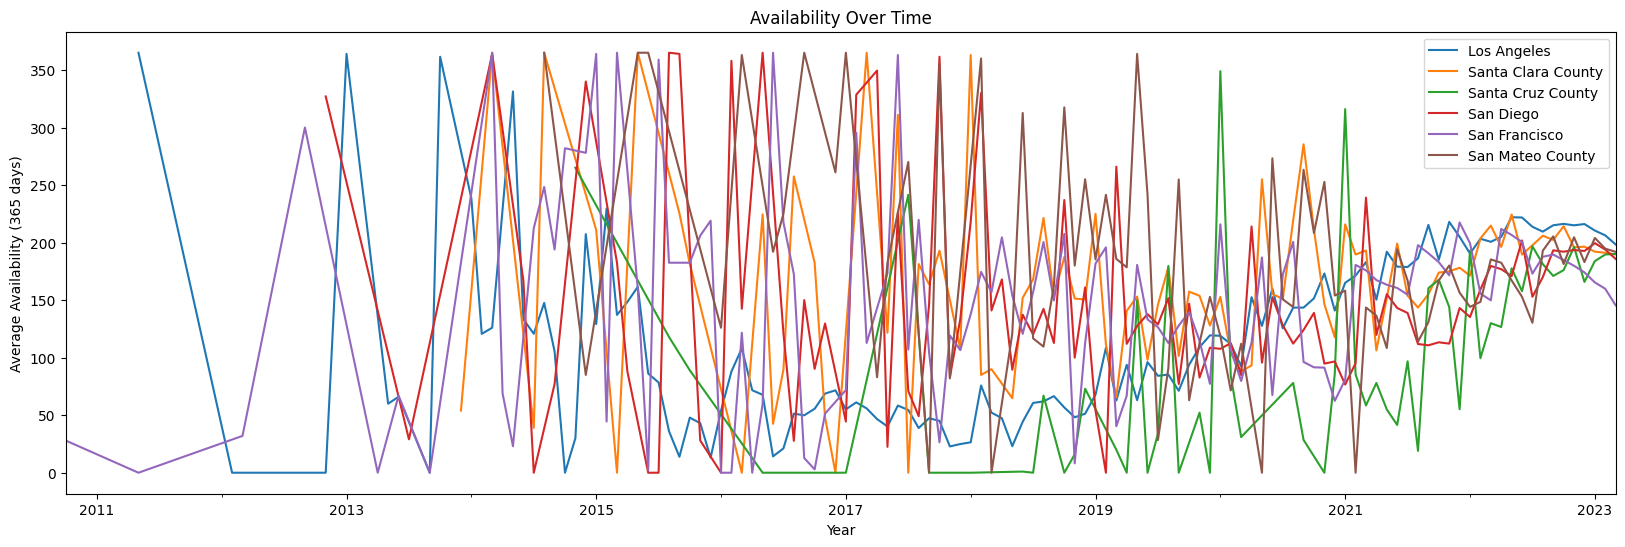

In [ ]:
LA_availability_over_time = df_LA.groupby(df_LA['last_review'].dt.to_period("M"))['availability_365'].mean()
SCl_availability_over_time = df_SCl.groupby(df_SCl['last_review'].dt.to_period("M"))['availability_365'].mean()
SCr_availability_over_time = df_SCr.groupby(df_SCr['last_review'].dt.to_period("M"))['availability_365'].mean()

SD_availability_over_time = df_SD.groupby(df_SD['last_review'].dt.to_period("M"))['availability_365'].mean()
SF_availability_over_time = df_SF.groupby(df_SF['last_review'].dt.to_period("M"))['availability_365'].mean()
SM_availability_over_time = df_SM.groupby(df_SM['last_review'].dt.to_period("M"))['availability_365'].mean()


plt.figure(figsize=(20, 6))
LA_availability_over_time.plot(kind='line', label='Los Angeles')
SCl_availability_over_time.plot(kind='line', label='Santa Clara County')
SCr_availability_over_time.plot(kind='line', label='Santa Cruz County')

SD_availability_over_time.plot(kind='line', label='San Diego')
SF_availability_over_time.plot(kind='line', label='San Francisco')
SM_availability_over_time.plot(kind='line', label='San Mateo County')

plt.xlabel('Year')
plt.ylabel('Average Availability (365 days)')
plt.title('Availability Over Time')
plt.legend()
plt.show()

Feature Engineering and Modeling
Price Prediction Model

We develop a regression model to predict Airbnb prices based on selected features.

In [ ]:
df_LA_subset = df_LA[['last_review', 'availability_365', 'price']]
df_SCl_subset = df_SCl[['last_review', 'availability_365', 'price']]
df_SCr_subset = df_SCr[['last_review', 'availability_365', 'price']]
df_SD_subset = df_SD[['last_review', 'availability_365', 'price']]
df_SF_subset = df_SF[['last_review', 'availability_365', 'price']]
df_SM_subset = df_SM[['last_review', 'availability_365', 'price']]


df_combined = pd.concat([df_LA_subset, df_SCl_subset, df_SCr_subset, df_SD_subset, df_SF_subset, df_SM_subset])

In [ ]:
california_availability_over_time = df_combined.groupby(df_combined['last_review'].dt.to_period("M"))['availability_365'].mean()

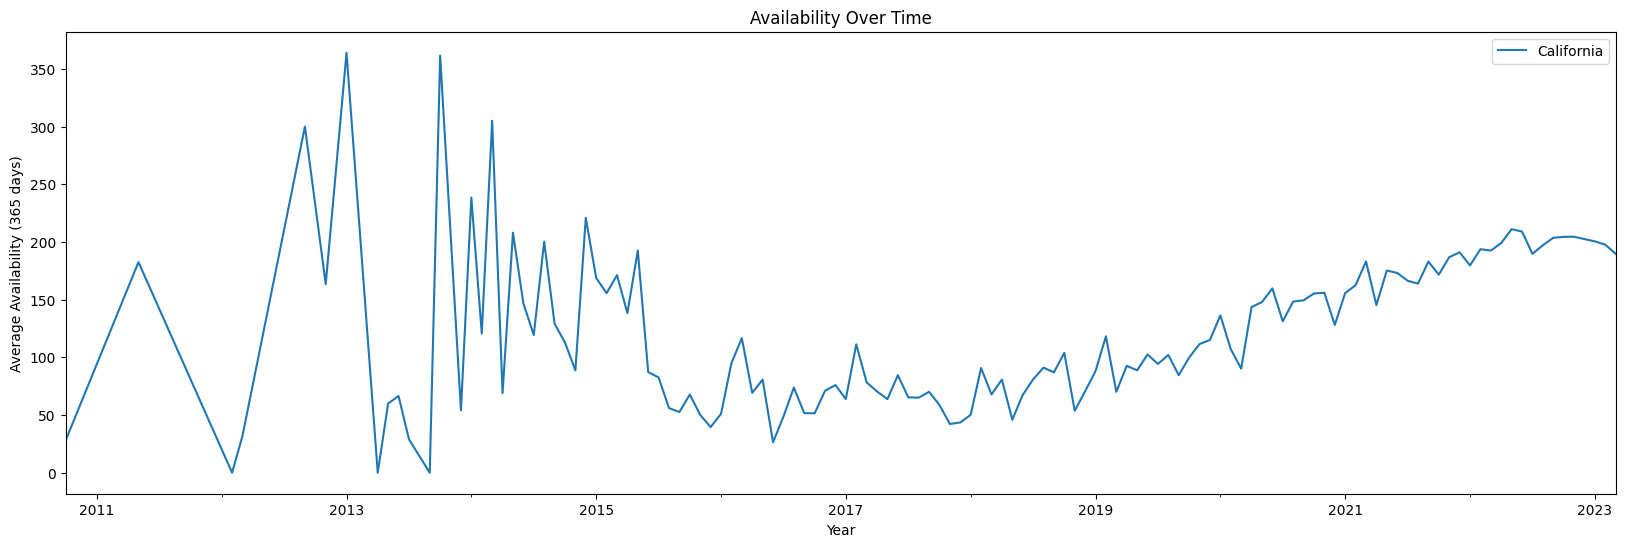

In [ ]:
plt.figure(figsize=(20, 6))
california_availability_over_time.plot(kind='line', label='California')
plt.xlabel('Year')
plt.ylabel('Average Availability (365 days)')
plt.title('Availability Over Time')
plt.legend()
plt.show()

Since prices across all counties are relatively close and there are no outliers, we do not need to perform standardization or normalizatin on the prices of the Airbnbs.

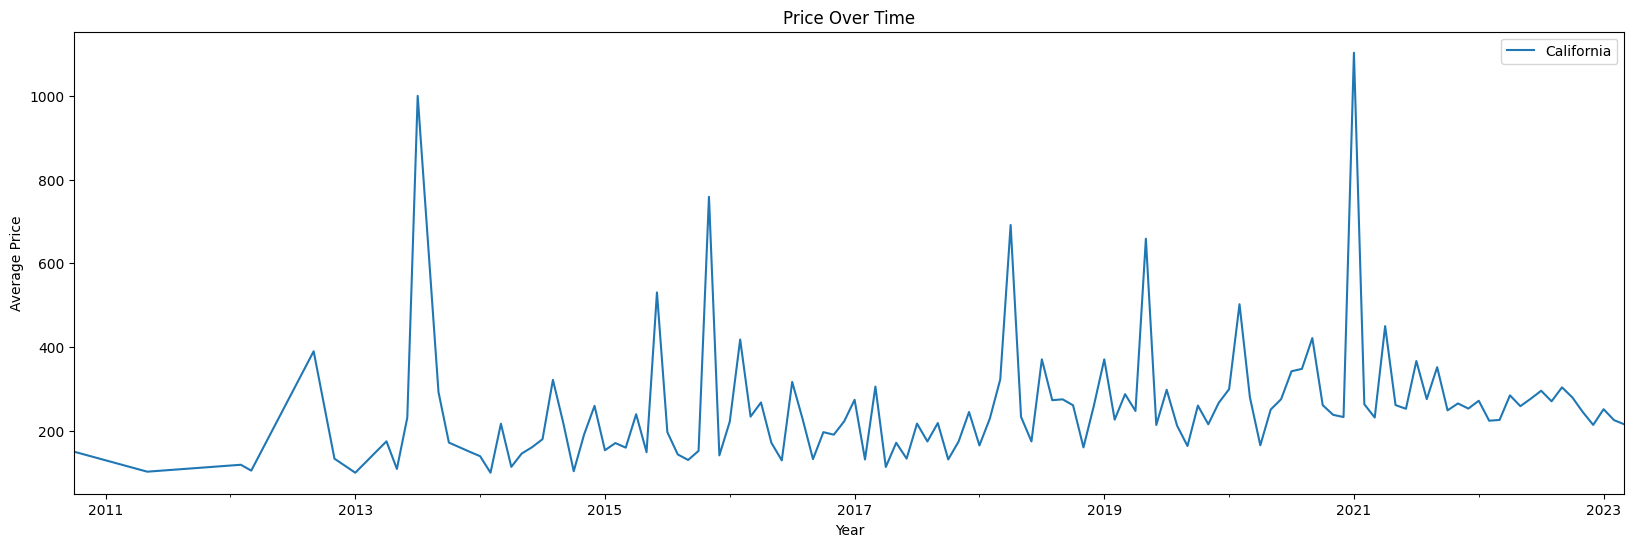

In [ ]:
california_price_over_time = df_combined.groupby(df_combined['last_review'].dt.to_period("M"))['price'].mean()

plt.figure(figsize=(20, 6))
california_price_over_time.plot(kind='line', label='California')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Price Over Time')
plt.legend()
plt.show()

The combination of data from several counties (Los Angeles, San Diego, San Francisco, San Mateo, Santa Clara, and Sacramento) resulted in a comprehensive dataset with over 50,000 rows, enabling robust statistical analysis. This breadth of data underscores the vibrancy and variation across California's Airbnb market.

The handling of missing data, particularly the visualization and comparison of missing values across different counties, underscores significant differences in data completeness which may impact the analysis. The proactive approach to cleaning (removing rows with missing values and unnecessary columns like 'license' and 'neighbourhood_group') ensures that further analysis is based on reliable data.

The transformation of the price from a string to a numeric value allowed for a more detailed analysis of pricing trends across counties. The observation that prices are relatively stable across regions suggests a degree of pricing homogeneity driven by standard market factors such as location amenities and review scores. The analysis of availability over time provides insights into the seasonal dynamics of the Airbnb market.

Insights and Recommendations
Key Findings

* The analysis reveals significant regional variations in pricing and guest preferences.
* Review scores have a notable impact on pricing strategies.

Recommendations

* Dynamic Pricing: Adjust prices based on real-time market data and upcoming local events.
* Customer Satisfaction: Enhance guest experience by focusing on factors that improve review scores.

Conclusion

* This project provided valuable insights into the factors affecting Airbnb listings in California. Our predictive models, while a starting point, highlight the complexity of the Airbnb market and the potential for further refinement.

###  Time series forecasting based on recurrent neural network

In this section, we delve into more sophisticated models like LSTM, GRU, and Simple RNN to enhance our time series predictions. These models are particularly well-suited for sequence prediction problems like those found in our Airbnb pricing and review score datasets.

In [ ]:
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

import warnings
warnings.filterwarnings('ignore')

In [ ]:
california_price_over_time  = california_price_over_time.reset_index()
california_price_over_time['date'] = california_price_over_time['last_review']

dataset = california_price_over_time.copy()
dataset.set_index('date', inplace=True)

In [ ]:
dataset

,last_review,price
date,,
2010-10,2010-10,150.000000
2011-05,2011-05,102.500000
2012-02,2012-02,119.000000
2012-03,2012-03,105.000000
2012-09,2012-09,390.000000
...,...,...
2022-11,2022-11,244.835551
2022-12,2022-12,214.217545
2023-01,2023-01,251.694352


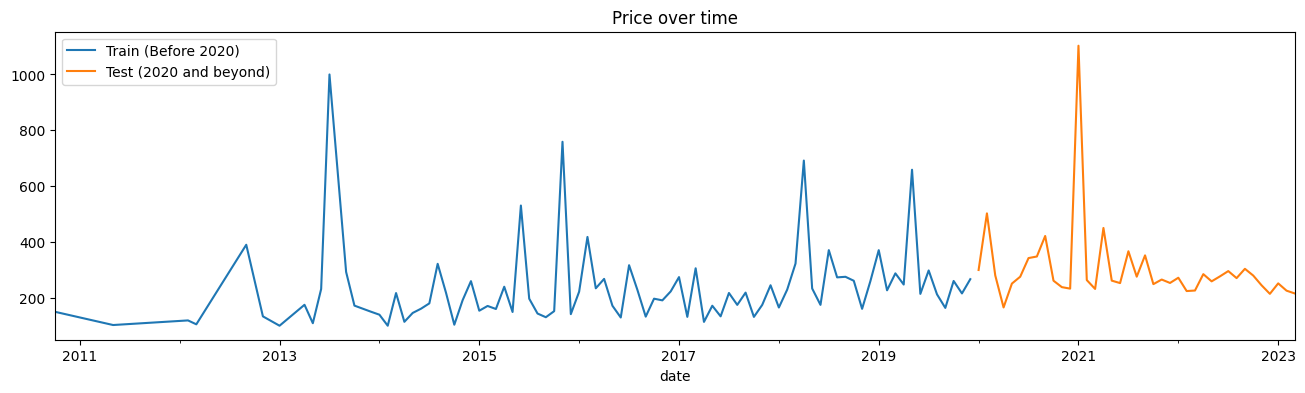

In [ ]:
tstart = 2010
tend = 2019

def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", 'price'].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, 'price'].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("Price over time")
    plt.show()

train_test_plot(dataset,tstart,tend)

In [ ]:
def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", 'price']
    test = dataset.loc[f"{tend+1}":, 'price']
    return train, test

def train_test_split_values(dataset, tstart, tend):
    train, test =  train_test_split(dataset, tstart, tend)
    return train.values, test.values

training_set, test_set = train_test_split_values(dataset, tstart, tend)

In [ ]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set.shape

(86, 1)

In [ ]:
def split_sequence(sequence, window):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + window
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

window_size = 30
features = 1

X_train, y_train = split_sequence(training_set_scaled, window_size)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)

In [ ]:
X_train.shape

(56, 30, 1)

### LSTM



LSTM (Long Short-Term Memory): LSTM units are a type of recurrent neural network (RNN) architecture that are well-suited to classifying, processing, and making predictions based on time series data. LSTMs are capable of learning long-term dependencies in data, which is crucial for our application where past pricing trends can influence future prices.

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, activation="tanh", input_shape=(window_size, features)))
model_lstm.add(Dense(25))
model_lstm.add(Dense(units=1))

model_lstm.compile(optimizer='adam', loss='mse')

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 125)               63500     
_________________________________________________________________
dense (Dense)                (None, 25)                3150      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 66,676
Trainable params: 66,676
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_lstm.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
7/7 [==============================] - 2s 9ms/step - loss: 0.0290
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0264
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0231
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0237
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0227
Epoch 8/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0222
Epoch 9/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0221
Epoch 10/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0222
Epoch 11/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0225
Epoch 12/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0224
Epoch 13/100
7/7 [==============================] - 0s 9ms

In [ ]:
dataset_total = dataset.loc[:,"price"]
inputs = dataset_total[len(dataset_total) - len(test_set) - window_size :].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [ ]:
X_test, y_test = split_sequence(inputs, window_size)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
predicted_price = model_lstm.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price)
y_test = sc.inverse_transform(y_test)

In [ ]:
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.show()


def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

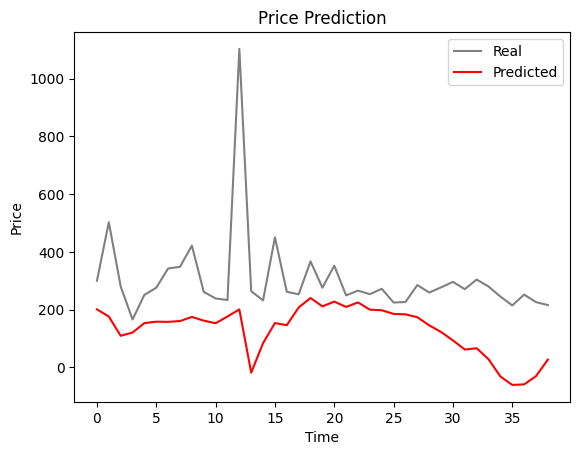

In [ ]:
plot_predictions(y_test,predicted_price)

In [ ]:
return_rmse(y_test,predicted_price)

The root mean squared error is 226.38.


### GRU

GRU (Gated Recurrent Unit): GRUs are similar to LSTMs with fewer parameters and therefore, they are computationally more efficient. They also solve the vanishing gradient problem and can capture dependencies from large sequences of data.

In [ ]:
model_gru = Sequential()
model_gru.add(GRU(units=125, activation="tanh", input_shape=(window_size, features)))
model_gru.add(Dense(units=1))

model_gru.compile(optimizer="adam", loss="mse")

model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 125)               48000     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 126       
Total params: 48,126
Trainable params: 48,126
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_gru.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
7/7 [==============================] - 2s 8ms/step - loss: 0.0363
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0232
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0228
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0226
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0224
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0224
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0221
Epoch 8/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0223
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0228
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0223
Epoch 11/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0220
Epoch 12/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0219
Epoch 13/100
7/7 [==============================] - 0s 7ms/st

In [ ]:
GRU_predicted_price = model_gru.predict(X_test)
GRU_predicted_price = sc.inverse_transform(GRU_predicted_price)

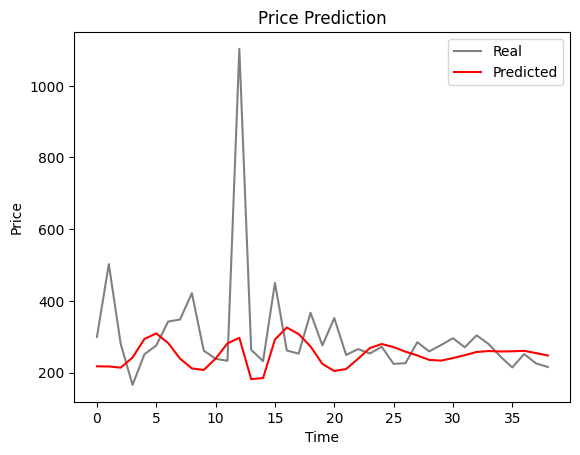

In [ ]:
plot_predictions(y_test, GRU_predicted_price)

In [ ]:
return_rmse(y_test,GRU_predicted_price)

The root mean squared error is 152.77.


### RNN

Simple RNN (Recurrent Neural Network): The simplest form of an RNN, capable of processing sequences of data by maintaining a state (memory) of previous inputs. However, Simple RNNs are generally less powerful and can struggle with longer sequences.

In [ ]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=125, activation="tanh", input_shape=(window_size, features)))
model_rnn.add(Dense(units=1))
model_rnn.compile(optimizer="adam", loss="mse")
model_rnn.summary()
model_rnn.fit(X_train, y_train, epochs=100, batch_size=8)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 125)               15875     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 126       
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 1s 4ms/step - loss: 0.0555
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0241
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0144
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0120
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0122
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0118
Epoch 7/100
7/7 [===========================

Epoch 97/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 98/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 99/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 100/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0081


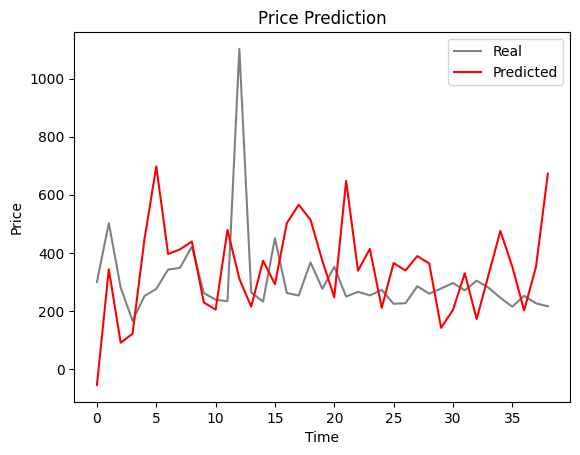

In [ ]:
RNN_predicted_price = model_rnn.predict(X_test)
RNN_predicted_price = sc.inverse_transform(RNN_predicted_price)
plot_predictions(y_test, RNN_predicted_price)

In [ ]:
return_rmse(y_test,RNN_predicted_price)

The root mean squared error is 223.41.


Three classic neural network models were used for time series prediction of price, and RMSE was used as the evaluation method. From the above experimental results, the GRU model has the best fitting effect, and the RMSE value is the lowest.

Modeling and Evaluation

Using these architectures, we aim to predict future Airbnb prices based on historical data. The following steps illustrate how to train these models and evaluate their performance.

This approach allows us to compare the efficacy of different RNN architectures in our specific use case. By analyzing the results, we can identify which model best captures the dynamics of the Airbnb market.

Conclusion
Incorporating advanced neural network models such as LSTM, GRU, and Simple RNN into our analysis has provided deeper insights into the predictive dynamics of Airbnb prices. These models have demonstrated varying degrees of effectiveness in capturing temporal dependencies, which are crucial for accurate time series forecasting in the Airbnb context.

The comprehensive cleaning and exploratory analysis pave the way for more detailed studies, such as the time series analysis of pricing and availability. The findings from this project can aid stakeholders in making decisions regarding property management, investment, and policy-making in the short-term rental market. Adjust prices based on the availability data and seasonal trends observed. For instance, increase prices during high-demand periods, which are often indicated by lower availability. Lower them during off-peak times to maintain competitive and attractive listings.

Future studies might focus on deeper behavioral analysis to understand the impact of reviews on consumer choices or expand the economic analysis to assess the impact of Airbnb on local housing markets. Additionally, integrating external data such as economic indicators or tourist influx could further enrich the analysis. With the observed stability in pricing and potential for off-peak vacancies, Airbnb could expand its offerings in long-term rentals, which could attract a different market segment, such as business travelers or temporary residents.

# Text Analysis EDA

Let's first do data cleaning on reviews data and do some EDA to see what we're working with.

In [ ]:
# Load the reviews datasets
files = [
    'SCrureviews_detailed.csv',
    'LAreviews_detailed.csv',
    'SDreviews_detailed.csv',
    'SFreviews_detailed.csv',
    'SMreviews_detailed.csv',
    'SClareviews_detailed.csv'
]

# Combine all datasets into one DataFrame
reviews_df = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)

# Cleaning Data
# Removing duplicate rows if any
reviews_df.drop_duplicates(inplace=True)

# Convert 'date' column to datetime format
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

# Drop rows with any missing value:
reviews_df.dropna(inplace=True)

# Let's take a peak at our new dataframe
reviews_df.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,8357,5798,2009-07-19,24381,Craig,Kitty and Michael are very warm and gracious h...
1,8357,6015,2009-07-23,26411,Angela Luna,What a gem! We had a wonderful stay in the Dom...
2,8357,6298,2009-07-28,27035,Noelle,We had come planning to do some hiking in the ...
3,8357,6452,2009-07-31,27756,Melissa,"A beautiful space, we enjoyed our stay!"
4,8357,6754,2009-08-04,28170,Lisa,This is a beautiful place to stay. I loved how...


Let's now perform some EDA

<class 'pandas.core.frame.DataFrame'>
Index: 2983733 entries, 0 to 2984493
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   listing_id     int64         
 1   id             int64         
 2   date           datetime64[ns]
 3   reviewer_id    int64         
 4   reviewer_name  object        
 5   comments       object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 159.3+ MB
None
         listing_id            id                           date   reviewer_id
count  2.983733e+06  2.983733e+06                        2983733  2.983733e+06
mean   3.860619e+16  2.544321e+17  2020-04-03 18:16:58.512313088  1.386711e+08
min    6.000000e+00  8.000000e+00            2008-06-22 00:00:00  1.000000e+00
25%    9.478896e+06  3.297714e+08            2018-09-28 00:00:00  3.005480e+07
50%    2.152511e+07  6.556357e+08            2020-08-23 00:00:00  9.383273e+07
75%    3.895690e+07  5.935198e+17            2022-03-29 00:00:0

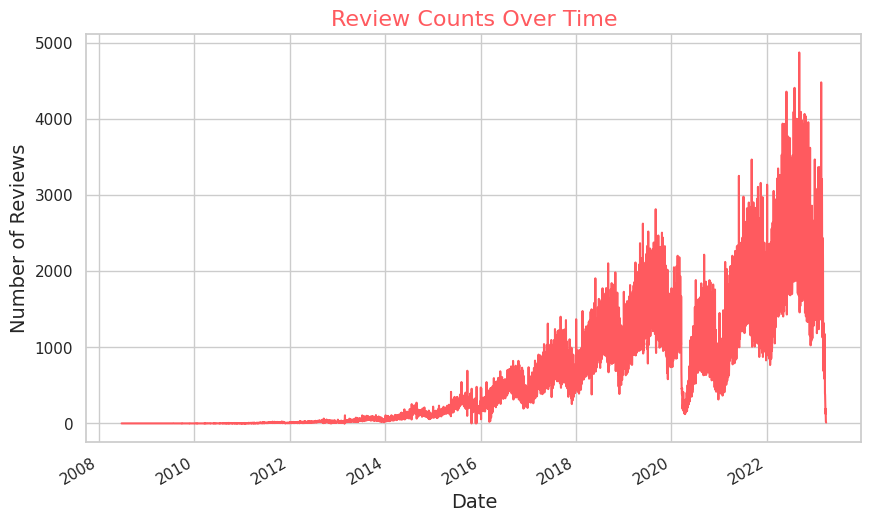

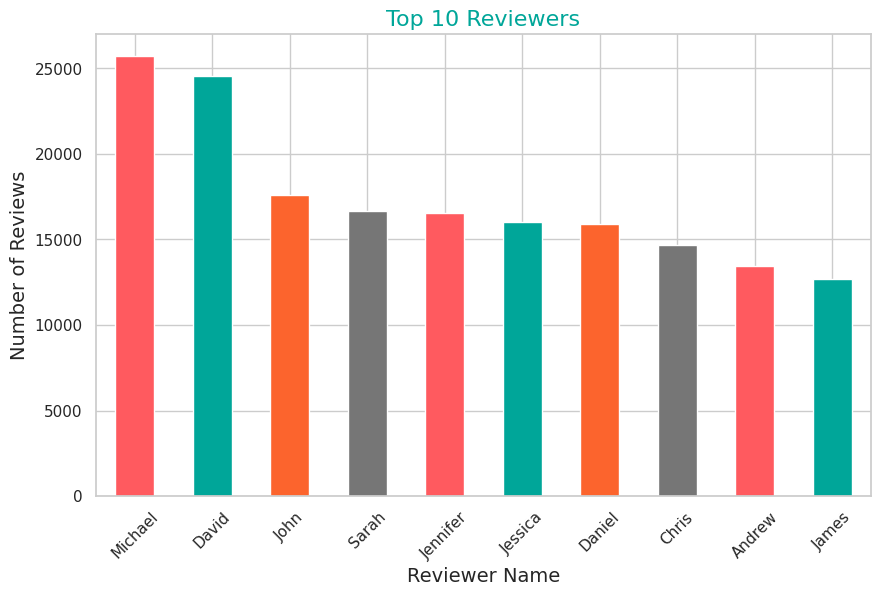

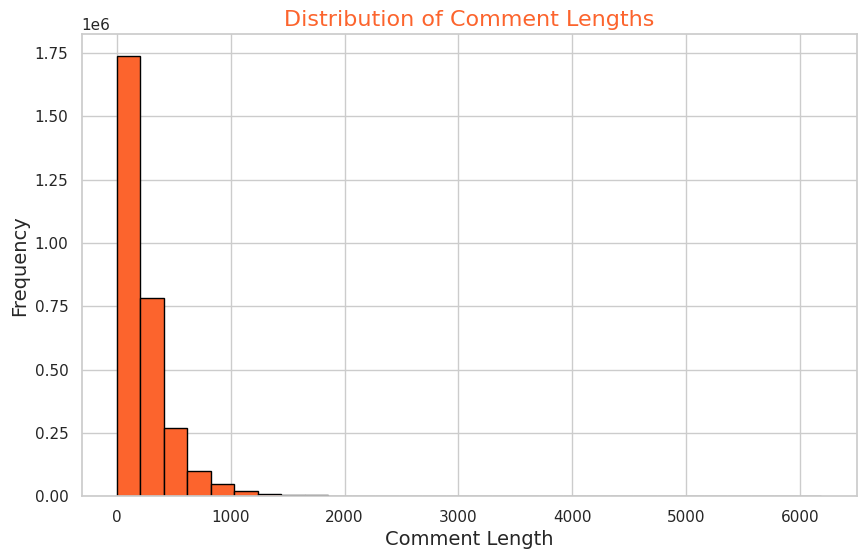

In [ ]:
# Basic info
print(reviews_df.info())

# Descriptive statistics for numerical columns
print(reviews_df.describe())

# Frequency of reviews by date
reviews_by_date = reviews_df['date'].value_counts().sort_index()

# Top 10 most active reviewers
top_reviewers = reviews_df['reviewer_name'].value_counts().head(10)



# Airbnb colour palette
airbnb_colors = ['#FF5A5F', '#00A699', '#FC642D', '#767676']

# Setting a style
sns.set(style="whitegrid")

# Review counts over time
plt.figure(figsize=(10, 6))
reviews_by_date.plot(color=airbnb_colors[0])
plt.title('Review Counts Over Time', fontsize=16, color=airbnb_colors[0])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.grid(True)
plt.show()

# Top 10 reviewers
plt.figure(figsize=(10, 6))
top_reviewers.plot(kind='bar', color=airbnb_colors[:len(top_reviewers)])
plt.title('Top 10 Reviewers', fontsize=16, color=airbnb_colors[1])
plt.xlabel('Reviewer Name', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Distribution of comment lengths
plt.figure(figsize=(10, 6))
reviews_df['comment_length'] = reviews_df['comments'].apply(len)
plt.hist(reviews_df['comment_length'], bins=30, color=airbnb_colors[2], edgecolor='black')
plt.title('Distribution of Comment Lengths', fontsize=16, color=airbnb_colors[2])
plt.xlabel('Comment Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


We will now try to identify the most commonly used words in the reviews.

We will use NLTK's word_tokenize for splitting the text into words and filter out stopwords and non-alphabetic tokens. We will apply the tokenization function to the comments column and compute the most common words.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


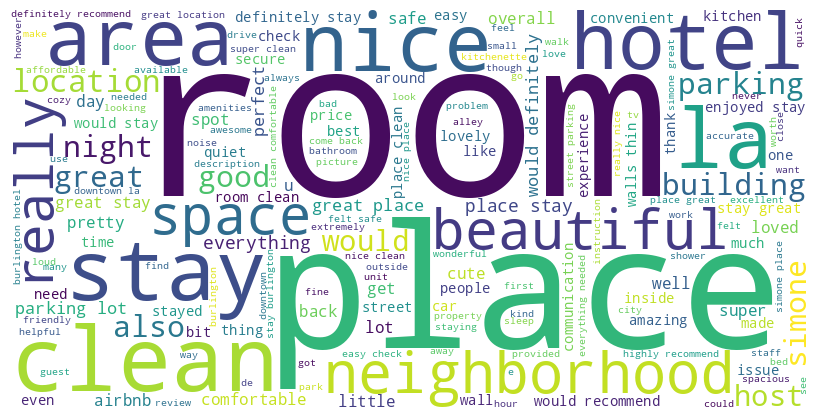

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Tokenization and stopword removal setup
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def tokenize_content(content):
    tokens = word_tokenize(content)
    filtered_tokens = [
        token.lower() for token in tokens
        if token.isalpha() and token.lower() not in stop_words
    ]
    return filtered_tokens

# Find the most reviewed listing
listing_counts = Counter(reviews_df['listing_id'])
most_reviewed_listing_id = listing_counts.most_common(1)[0][0]

# Subset DataFrame to only include reviews for the most reviewed listing
most_reviewed_listing_df = reviews_df[reviews_df['listing_id'] == most_reviewed_listing_id]

# Extract the comments and tokenize them
reviews = most_reviewed_listing_df['comments'].dropna().tolist()
top_tokens_list = [tokenize_content(review) for review in reviews]

# Flatten the list of tokens
top_tokens = [token for sublist in top_tokens_list for token in sublist]

# Now let's load the listing details to get the properties of the most reviewed listing
# load the relavent data
df_LA_detailed = pd.read_csv("LAlistings.csv")
df_SCl_detailed = pd.read_csv("SClalistings.csv")
df_SCr_detailed = pd.read_csv("SCrulistings.csv")
df_SD_detailed = pd.read_csv("SDlistings.csv")
df_SF_detailed = pd.read_csv("SFlistings.csv")
df_SM_detailed = pd.read_csv("SMlistings.csv")

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud data
wordcloud_data = ' '.join(top_tokens)

# Create the word cloud
wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color ='white',
    stopwords = set(stopwords.words('english')),
    min_font_size = 10
).generate(wordcloud_data)

# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

As we can see, some of the top used words are "place" and "room". However, it is interesting that we also see someone's name in the word cloud - *Simone*. I wonder why this particular person is always mentioned.

Let's try to identify the most popular Airbnb listing.

In [ ]:
# concatenating the cleaned dataframe of the Airbnb listings for each Californian city
california_detailed_df = pd.concat([df_LA_detailed, df_SCl_detailed, df_SCr_detailed, df_SD_detailed, df_SF_detailed, df_SM_detailed])

most_reviewed_listing_details = california_detailed_df[california_detailed_df['id'] == most_reviewed_listing_id]

print("Properties of the most reviewed listing:")
print(most_reviewed_listing_details)

Properties of the most reviewed listing:
             id                  name    host_id host_name  \
13998  42409434  The Burlington Hotel  229716119    Simone   

       neighbourhood_group neighbourhood  latitude  longitude  \
13998  City of Los Angeles      Westlake  34.05981 -118.26963   

             room_type  price  minimum_nights  number_of_reviews last_review  \
13998  Entire home/apt    116               1               2084  2023-03-06   

       reviews_per_month  calculated_host_listings_count  availability_365  \
13998              57.46                               4               189   

       number_of_reviews_ltm license  
13998                    762     NaN  


AH, now this makes sense. Simone is the host of the most reviewed listing in California - The Burlington Hotel in Los Angelos

### Sentiment Analysis on Reviews


Now let's do AFINN analysis.
AFINN is a Wordlist-based approach for sentiment analysis.


But before thise, Let's do a monthly reviews check

Performing a monthly distribution check on reviews helps in identifying seasonal patterns and ensures the data's consistency for accurate analysis. It also aids in reducing temporal biases and improving resource planning based on observed trends. As we will see, we have roughly the same number of reviews across all months.

In [ ]:
from datetime import datetime
import calendar

# Convert the 'date' column to datetime objects
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

# Extract the month from the 'date' column and convert it to month names
reviews_df['month_name'] = reviews_df['date'].dt.month.apply(lambda x: calendar.month_name[x])

# Drop rows with any missing values if necessary
reviews_df.dropna(inplace=True)

# Get the count of reviews for each month
monthly_review_counts = reviews_df['month_name'].value_counts().reindex(calendar.month_name[1:], fill_value=0)

# Print the monthly review counts
print(monthly_review_counts)

month_name
January      235436
February     239363
March        233389
April        201349
May          236593
June         249020
July         285415
August       298858
September    272245
October      277919
November     241509
December     212637
Name: count, dtype: int64


OK now we are ready for the AFINN analysis. First, install the AFINN package

In [ ]:
!pip install afinn
from afinn import Afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=f5d38e3bb50ac886a20e46c5cb52a964147615f2ab97d2725e9ea20c7a82338e
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


### Visualize distribution of afinn score

Since we have a large dataset of reviews we can perform batch processing to process the comments in chunks. This way we can see the progress through this long wait. Use the tqdm package for batch processing.

In [ ]:
!pip install tqdm
from tqdm import tqdm

In [ ]:
# Set our language to english
afinn = Afinn(language='en')

# Break the dataset into smaller chunks
chunk_size = 1000
chunks = [reviews_df[i:i + chunk_size] for i in range(0, reviews_df.shape[0], chunk_size)]

scores = []
for chunk in tqdm(chunks, desc='Scoring Comments'):
    scores.extend(chunk['comments'].astype(str).apply(afinn.score))

# Once all chunks have been processed, add the scores back to the original dataframe
reviews_df['score'] = scores

Scoring Comments: 100%|██████████| 2984/2984 [1:32:15<00:00,  1.86s/it]


<ipython-input-64-3ead48a86641>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="score", data=filtered_reviews, palette="viridis")


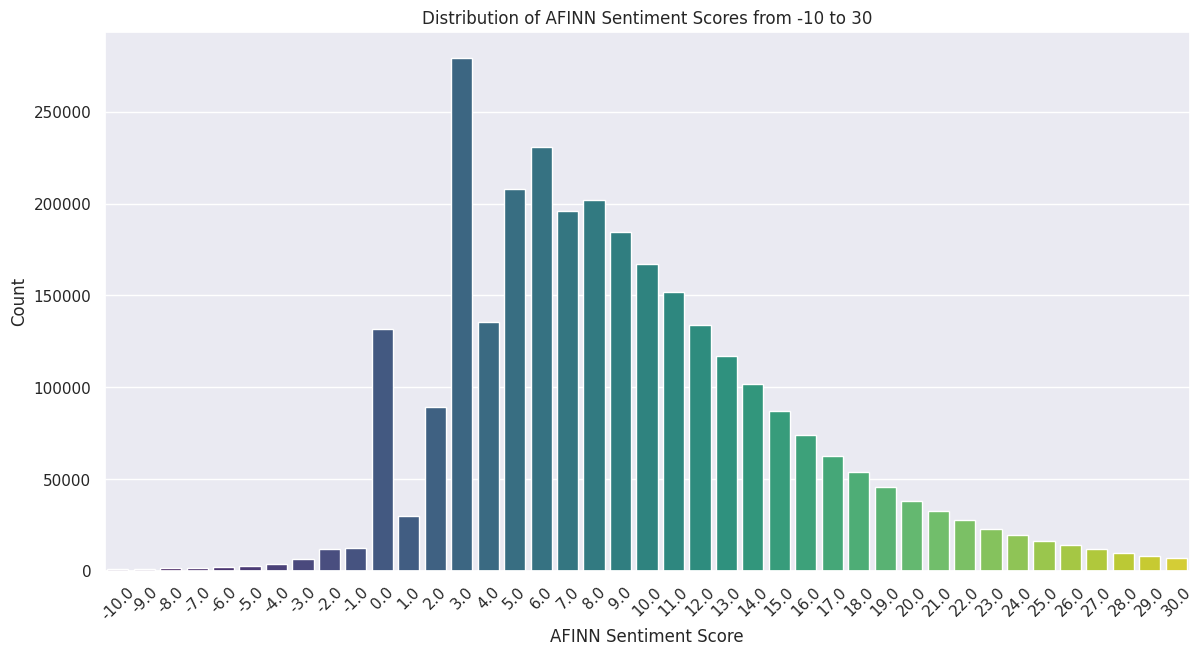

In [ ]:
# Filter the DataFrame to include only rows with scores from -10 to 30
filtered_reviews = reviews_df[(reviews_df['score'] >= -10) & (reviews_df['score'] <= 30)]

# Now plot the distribution of AFINN scores within the range -10 to 30
sns.set_theme(style="darkgrid")
plt.figure(figsize=(14,7))
ax = sns.countplot(x="score", data=filtered_reviews, palette="viridis")
ax.set_title('Distribution of AFINN Sentiment Scores from -10 to 30')
plt.xticks(rotation=45)
plt.xlabel('AFINN Sentiment Score')
plt.ylabel('Count')
plt.show()

The distribution has the highest peak at a score of 3.0, indicating that a score of 3.0 is the most frequent sentiment score among the reviews. This suggests that positive sentiment is more common than neutral or negative in the dataset, which could imply a generally positive reaction in the reviews. It's a positive-skewed distribution with the mode at 3.0. The concentration of reviews with a positive AFINN score, particularly at 3.0, stands out against other scores.

- This is surprising as we expected scores to follow a normal distribution centered around 0 as a neutral sentiment

## Correlation between sentiment score and listing popularity.

We can use availability_365 as a proxy for popularity. A lower availability could imply higher bookings, if there is consistent demand across listings.

In [ ]:
average_sentiment_per_listing = reviews_df.groupby('listing_id')['score'].mean().reset_index()
average_sentiment_per_listing.rename(columns={'score': 'average_sentiment'}, inplace=True)

In [ ]:
# Merge the booking ID info with the sentiment data
merged_df = pd.merge(california_detailed_df, average_sentiment_per_listing, left_on='id', right_on='listing_id', how='left')


In [ ]:
# Correlation calculation
correlation = merged_df[['average_sentiment', 'availability_365']].corr()
print("Correlation between average sentiment and availability:")
print(correlation)


Correlation between average sentiment and availability:
                   average_sentiment  availability_365
average_sentiment           1.000000         -0.041694
availability_365           -0.041694          1.000000


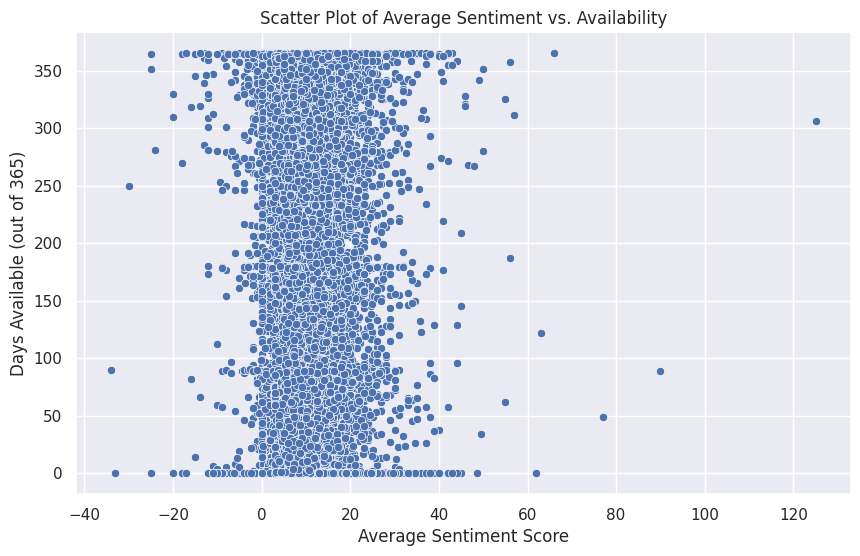

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='average_sentiment', y='availability_365')
plt.title('Scatter Plot of Average Sentiment vs. Availability')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Days Available (out of 365)')
plt.show()


There does not appear to be a  linear relationship between sentiment scores and availability. However, availability is influenced by various factors, including location, price, seasonality, and type of accommodation. Sentiment scores are just one of the factors that affect popularity.

## ARIMA Analysis

Now we will do some time series analysis with the ARIMA model that we learned in Module 12 of the course.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Convert 'date' column to datetime
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

# Calculate the average score per day
reviews_by_date = reviews_df.groupby('date')['score'].mean().reset_index()

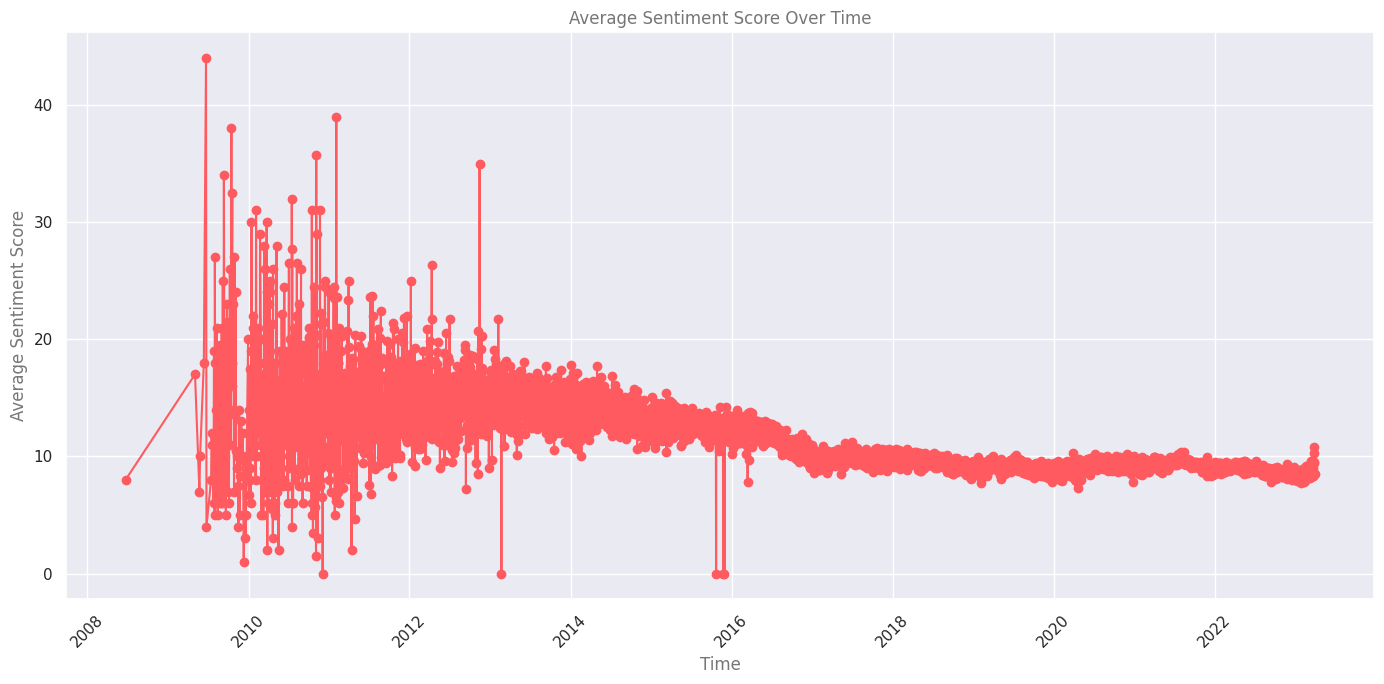

In [ ]:
# Plot the average sentiment score
plt.figure(figsize=(14, 7))
plt.plot(reviews_by_date['date'], reviews_by_date['score'], marker='o', linestyle='-', color='#FF5A5F')
plt.title("Average Sentiment Score Over Time", color='#767676')
plt.xlabel("Time", color='#767676')
plt.ylabel("Average Sentiment Score", color='#767676')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There is considerable variability in sentiment scores in the early years. This is probably due to a smaller number of reviews, which would allow individual extreme reviews to skew the average more significantly. As time progresses, the variability in sentiment scores seems to decrease. This might be due to an increase in the volume of reviews, which tends to normalize extremes and could indicate a maturation of the Airbnb platform and its review system.

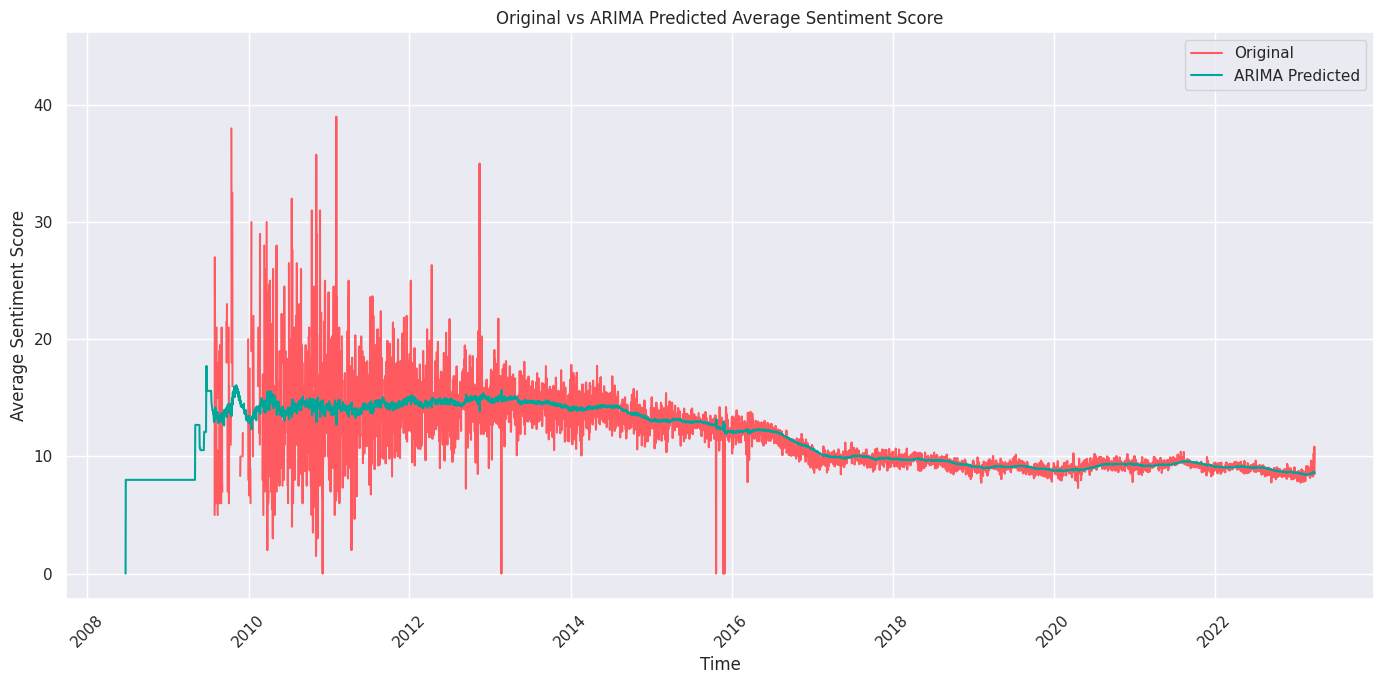

In [ ]:
# Ensure that the 'score' column is of numeric type
reviews_df['score'] = pd.to_numeric(reviews_df['score'], errors='coerce')

# Drop NaN values that may have resulted from non-numeric entries
reviews_df.dropna(subset=['score'], inplace=True)

# Convert 'date' column to datetime
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

# Set the 'date' column as the index
reviews_df.set_index('date', inplace=True)

# Now, resample and compute the mean of the 'score' column only
reviews_by_date = reviews_df['score'].resample('D').mean()

reviews_by_date = reviews_by_date.to_frame(name='score')

# Fit the ARIMA model
model = ARIMA(reviews_by_date['score'], order=(1,1,1))
model_fit = model.fit()

# Add the predicted scores to the DataFrame
reviews_by_date['predicted_score'] = model_fit.predict(start=reviews_by_date.index[0], end=reviews_by_date.index[-1])

# Now let's plot
plt.figure(figsize=(14, 7))
plt.plot(reviews_by_date.index, reviews_by_date['score'], label='Original', color='#FF5A5F')
plt.plot(reviews_by_date.index, reviews_by_date['predicted_score'], label='ARIMA Predicted', color='#00A699')
plt.legend()
plt.title("Original vs ARIMA Predicted Average Sentiment Score")
plt.xlabel("Time")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Original Data (Red Line): The red line represents the actual average sentiment scores. It shows significant fluctuations in the early years, which taper off as time progresses, suggesting either increasing consistency in reviews or an increasing volume of reviews that average out extreme sentiments.
ARIMA Predictions (Teal Line): The teal line indicates the ARIMA model's predicted sentiment scores. The model appears to capture the general trend of the data rather than specific fluctuations. This makes sense as the ARIMA model is tuned to understand the underlying trend in the data, but it does not react to short-term variations or noise.
Also noteworthy is that the ARIMA model does not capture the high variability and extreme values in the early years. This is common in ARIMA models, which tend to focus on the central trend rather than outliers or noise.
As the actual data stabilizes over time, the ARIMA model's predictions align more closely with the actual sentiment scores, indicating that the model is likely a good fit for the latter years when the data has less variance.

## Geographical Mapping

In [ ]:
!pip install geopandas

In [ ]:
!pip install folium

from the listings datasets, we just need to extract the latitude/longitude data.


In [ ]:
import folium
from folium.plugins import MarkerCluster

# Load and combine the listings datasets for different Californian cities
df_LA_detailed = pd.read_csv("LAlistings.csv")
df_SCl_detailed = pd.read_csv("SClalistings.csv")
df_SCr_detailed = pd.read_csv("SCrulistings.csv")
df_SD_detailed = pd.read_csv("SDlistings.csv")
df_SF_detailed = pd.read_csv("SFlistings.csv")
df_SM_detailed = pd.read_csv("SMlistings.csv")

# Concatenate the listings dataframes into one
california_listings_df = pd.concat([
    df_LA_detailed,
    df_SCl_detailed,
    df_SCr_detailed,
    df_SD_detailed,
    df_SF_detailed,
    df_SM_detailed
])

# Merge reviews with listings to get latitude and longitude for each review
reviews_with_location = reviews_df.merge(california_listings_df, left_on='listing_id', right_on='id')

# Run the following code if you would like to see a map with each review plotted.
# You can click on a particular marker and the comments will pop-up.
# However, this will be very time consuming to run.

# # Create a map centered around California
# california_map = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# # Use MarkerCluster to cluster the markers and add them to the map
# marker_cluster = MarkerCluster().add_to(california_map)

# # For each review, add a marker to the map
# for idx, row in reviews_with_location.iterrows():
#     folium.Marker(
#         location=[row['latitude'], row['longitude']],
#         popup=row['comments'],
#     ).add_to(marker_cluster)

# # Display the map
# california_map.save('california_reviews_map.html')
# california_map


On the map of California, let's plot circles with radius proportional to the number of reviews and colour-coded by the average sentiment score.

If the colour is green, there is a positive sentiment. Blue - neutral. Red - negative.

In [ ]:
# Aggregate the reviews to calculate average sentiment score and review count per location
aggregated_data = reviews_with_location.groupby(['latitude', 'longitude']).agg({
    'score': 'mean',
    'comments': 'count'
}).reset_index()

# Create a map centered around California
california_map = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Add aggregated data to the map
for idx, row in aggregated_data.iterrows():
    # The circle's radius is proportional to the log of the review count to reduce the range
    radius = 5 * np.log(row['comments']+1)  # The +1 ensures no division by zero

    # Choose the color based on the sentiment score
    if row['score'] > 0:
        # Positive sentiment in green
        color = "#2E8B57"
    elif row['score'] < 0:
        # Negative sentiment in red
        color = "#FF6347"
    else:
        # Neutral sentiment in blue
        color = "#4682B4"

    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=radius,
        color=color,
        fill=True,
        fill_color=color
    ).add_to(california_map)

# Display the map
california_map.save('california_reviews_aggregated_map.html')
california_map

After running the code, an HTML file will be created. Please open this file in your browser. You will see that almost all neighbourhoods are green, indicating a positive sentiment. There are limited blue and even less red circles peaking through the green. Clusters are centered around the SF Bay Area, Los Angelos, and San Diego. Feel free to zoom in and dive deep into neighbourhoods of interest and explore on your own!

## Network Science

Now lets try to do some Network Science analysis that we learned in Module 5 of the course. This type of analysis could potentially be useful for marketing purposes from Airbnb's perspective. They can see what users are the most active and influential within the California Airbnb community. They can then reach out to them for marketing campaigns. Since these folks are the most influential, they will have the most knowledge and most connections. This may increase the success of Aribnb's marketing campaings.

In [ ]:
import networkx as nx

# Create a new graph instance
G = nx.Graph()

# Add edges to the graph from the reviews dataframe - this creates nodes as well
# We will add an edge between reviewer_id and listing_id for each review
for idx, row in reviews_df.iterrows():
    G.add_edge(row['reviewer_id'], row['listing_id'])

# Calculate degree centrality for the graph
degree_centrality = nx.degree_centrality(G)

# Create a centrality DataFrame
centrality_df = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['centrality'])

# Reset the index to turn the index into a column
centrality_df.reset_index(inplace=True)

# Rename the columns to match with 'reviews_df'
centrality_df.rename(columns={'index': 'reviewer_id'}, inplace=True)

# Merge the centrality scores back into the reviews_df
reviews_with_centrality = reviews_df.merge(centrality_df, on='reviewer_id')

# Now, we can sort reviews_with_centrality by 'centrality'
sorted_reviews = reviews_with_centrality.sort_values(by='centrality', ascending=False)

In [ ]:
unique_sorted_reviewers = sorted_reviews[['reviewer_id', 'reviewer_name', 'centrality']].drop_duplicates()
# Print the top reviewers by centrality
print(unique_sorted_reviewers.head())

         reviewer_id reviewer_name  centrality
382754       6092596           Ben    0.000297
1769082        69838          Mara    0.000282
2614854     17267707        Justin    0.000255
1476401       212783          Rose    0.000233
584800       2178509          Jody    0.000211


We can see that these reviewers have reviewed many different listings. These users are highly active and engaged on the platform, which can be valuable information for understanding customer behavior. However, just because a reviewer has a high centrality because they have reviewed many listings, doesn't necessarily mean they are influential in terms of their opinions shaping others' behaviors. It simply means they are active on the platform. So Airbnb must also be mindful about this when executing their business strategies.

# Regression

The following section takes the detailed listing of all cities in California and concatenating them into one large dataframe for all of California. Then, we perform regression analysis to determine the best predictors for the price of each listing.

In [ ]:
# load the relavent data
df_LA_detailed = pd.read_csv("LAlistings_detailed.csv")
df_SCl_detailed = pd.read_csv("SClalistings_detailed.csv")
df_SCr_detailed = pd.read_csv("SCrlistings_detailed.csv")
df_SD_detailed = pd.read_csv("SDlistings_detailed.csv")
df_SF_detailed = pd.read_csv("SFlistings_detailed.csv")
df_SM_detailed = pd.read_csv("SMlistings_detailed.csv")


# concatenating the cleaned dataframe of the Airbnb listings for each Californian city
california_detailed_df = pd.concat([df_LA_detailed, df_SCl_detailed, df_SCr_detailed, df_SD_detailed, df_SF_detailed, df_SM_detailed])
# getting a sense of what columns we can work with
california_detailed_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,777451666060243581,https://www.airbnb.com/rooms/777451666060243581,20230307175359,2023-03-07,city scrape,Family oriented home,Relax with the whole family at this peaceful p...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,490709958,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,698097753730921190,https://www.airbnb.com/rooms/698097753730921190,20230307175359,2023-03-07,city scrape,方便易居驿站,NaN,NaN,https://a0.muscache.com/pictures/d5afff58-d576...,444692513,...,5.00,5.00,4.40,NaN,f,4,0,4,0,0.86
2,13063118,https://www.airbnb.com/rooms/13063118,20230307175359,2023-03-07,city scrape,TERRANEA OCEANFRNT 1BR CASITA -203 RSRT AMENIT...,LOCATION! Luxury upstairs Oceanside Casita gue...,No need to fly away from Los Angeles for a get...,https://a0.muscache.com/pictures/6227287c-7073...,41736985,...,4.96,4.92,4.83,NaN,f,10,5,5,0,0.64
3,39337076,https://www.airbnb.com/rooms/39337076,20230307175359,2023-03-07,city scrape,Brand New Duplex Near World Cruise Center,Welcome to our new cozy duplex!<br /><br />Loc...,"Our property is close to downtown San Pedro, t...",https://a0.muscache.com/pictures/miso/Hosting-...,208375458,...,4.86,4.66,4.82,NaN,t,4,0,4,0,1.09
4,13077628,https://www.airbnb.com/rooms/13077628,20230307175359,2023-03-07,city scrape,Zuma Malibu Retreat,Our Private 16 Acre Malibu Retreat is located ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4182067,...,4.79,4.64,4.36,STR21-0228,f,1,1,0,0,0.18


##Rationale for Excluding  Columns
**Columns to Include**

Of the large number of columns, we choose to only include the following for our regression:

host_response_rate, host_acceptance_rate, host_is_superhost, host_total_listings_count, host_has_profile_pic, host_identity_verified, room_type, accommodates, bathrooms_text, bedrooms, beds, price, minimum_nights, maximum_nights, number_of_reviews, review_scores_rating
****

**Explanation for Excluded Columns**

While a detailed discussion of why each individual column is removed would be too tedious for the reader, below are some broad reasons why certain columns were removed:
- highly customized non-numerical data such as host_name, description, etc.
- variables that would prevent our model from being applicable in other situations if included (e.g. neighbourhood and other geographically specific information)
- columns that likely correlate to each other (e.g. minimum_minimum_nights and maximum_minimum_nights, review_scores_rating and the various breakdowns of said rating, etc.)

In [ ]:
# keep only the columns we want
california_detailed_df = california_detailed_df[['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating']]
california_detailed_df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,100%,0%,f,1.0,f,t,7,3.5 baths,4.0,3.0,$399.00,3,365,0,NaN
1,100%,100%,t,5.0,t,t,2,1 shared bath,1.0,1.0,$46.00,3,90,5,5.00
2,100%,86%,f,22.0,t,t,3,1 bath,1.0,1.0,$408.00,3,29,53,4.92
3,100%,99%,t,6.0,t,t,2,1 shared bath,1.0,1.0,$80.00,2,1125,44,4.80
4,100%,NaN,f,6.0,t,t,8,2 baths,3.0,4.0,"$2,138.00",7,28,15,4.79


In [ ]:
pd.options.mode.chained_assignment = None

# for our purposes, we will treat listings with no reviews as if they have a review of 0
california_detailed_df['review_scores_rating'] = california_detailed_df['review_scores_rating'].fillna(0)

# first drop all the NaN so that we can reduce data size early (saves work later on)
california_detailed_df = california_detailed_df.dropna()

# change the t/f of certain columns into 1 and 0
california_detailed_df['host_is_superhost'] = california_detailed_df['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)
california_detailed_df['host_has_profile_pic'] = california_detailed_df['host_has_profile_pic'].apply(lambda x: 1 if x == 't' else 0)
california_detailed_df['host_identity_verified'] = california_detailed_df['host_identity_verified'].apply(lambda x: 1 if x == 't' else 0)

# reformat the numbers that appear as text (e.g. getting rid of $ or % symbols)
california_detailed_df['price'] = california_detailed_df['price'].apply(lambda x: x[1:].replace(',',''))
california_detailed_df['bathrooms_text'] = california_detailed_df['bathrooms_text'].astype(str).apply(lambda x: x.split(None, 1)[0])
california_detailed_df['host_response_rate'] = california_detailed_df['host_response_rate'].apply(lambda x: x[:-1])
california_detailed_df['host_acceptance_rate'] = california_detailed_df['host_acceptance_rate'].apply(lambda x: x[:-1])

# cast to float so that we may work with it
california_detailed_df['bathrooms_text'] = pd.to_numeric(california_detailed_df['bathrooms_text'], errors='coerce')
california_detailed_df = california_detailed_df.astype('float64')
california_detailed_df = california_detailed_df.dropna()

# show the first few rows of the data we are working with
california_detailed_df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,100.0,0.0,0.0,1.0,0.0,1.0,7.0,3.5,4.0,3.0,399.0,3.0,365.0,0.0,0.00
1,100.0,100.0,1.0,5.0,1.0,1.0,2.0,1.0,1.0,1.0,46.0,3.0,90.0,5.0,5.00
2,100.0,86.0,0.0,22.0,1.0,1.0,3.0,1.0,1.0,1.0,408.0,3.0,29.0,53.0,4.92
3,100.0,99.0,1.0,6.0,1.0,1.0,2.0,1.0,1.0,1.0,80.0,2.0,1125.0,44.0,4.80
5,100.0,100.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,55.0,2.0,1125.0,3.0,5.00


In [ ]:
# generate a correlation matrix
california_detailed_df.corr()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
host_response_rate,1.000000,0.361866,0.184396,0.049655,0.035547,0.036129,0.022339,-0.010087,-0.003854,0.014325,-0.026497,-0.061016,-0.000019,0.075538,0.081876
host_acceptance_rate,0.361866,1.000000,0.187128,0.083298,0.019558,0.028927,0.042029,-0.034918,-0.019486,0.017378,-0.033960,-0.137503,-0.016247,0.119136,0.072600
host_is_superhost,0.184396,0.187128,1.000000,-0.161100,0.056778,0.013662,0.000615,0.003741,-0.014246,0.008078,-0.024704,-0.039148,-0.008511,0.232190,0.194706
host_total_listings_count,0.049655,0.083298,-0.161100,1.000000,0.026693,0.077919,-0.065066,-0.007595,-0.065348,-0.075217,-0.004071,0.173138,0.021674,-0.126896,-0.298846
host_has_profile_pic,0.035547,0.019558,0.056778,0.026693,1.000000,0.077171,0.013938,0.013587,0.005817,0.014341,0.006536,0.007499,0.004648,0.040587,0.038727
host_identity_verified,0.036129,0.028927,0.013662,0.077919,0.077171,1.000000,0.014451,0.038662,0.016897,0.012350,0.005659,0.021451,0.003024,-0.013748,-0.033288
accommodates,0.022339,0.042029,0.000615,-0.065066,0.013938,0.014451,1.000000,0.641932,0.838272,0.830527,0.238790,-0.115710,0.006849,-0.055931,-0.000617
bathrooms_text,-0.010087,-0.034918,0.003741,-0.007595,0.013587,0.038662,0.641932,1.000000,0.741105,0.630108,0.291053,0.005147,0.000917,-0.128474,-0.126096
bedrooms,-0.003854,-0.019486,-0.014246,-0.065348,0.005817,0.016897,0.838272,0.741105,1.000000,0.824142,0.260726,-0.066385,0.005355,-0.091264,0.002192
beds,0.014325,0.017378,0.008078,-0.075217,0.014341,0.012350,0.830527,0.630108,0.824142,1.000000,0.216488,-0.087058,0.002290,-0.050127,0.009332


From the above correlation matrix, we note that the columns accommodates, bedrooms, and beds are highly correlated, so we have decided to drop bedrooms and beds.

In [ ]:
# drop some of the highly correlated columns
california_detailed_df = california_detailed_df.drop(['bedrooms', 'beds'], axis=1)

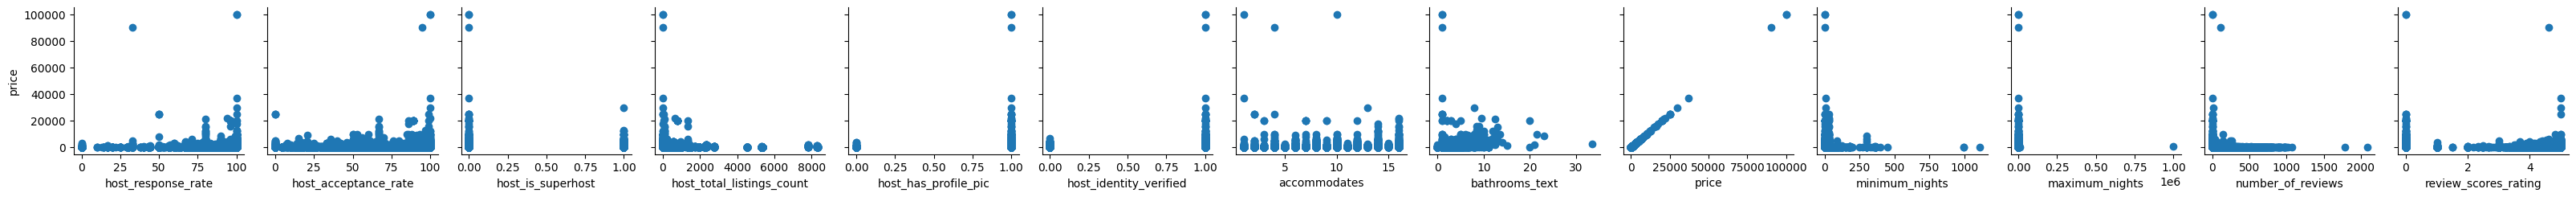

In [ ]:
# plotting the distribution to understand how the regression model should look like
grid = sns.PairGrid(california_detailed_df, y_vars='price')
grid = grid.map(plt.scatter)
plt.show()

##Linear Regression

In [ ]:
# split data into training and testing
train_df, test_df = train_test_split(california_detailed_df, train_size=0.8)

# split into x and y
X_train = train_df.drop(['price'], axis=1)
y_train = train_df[['price']]

X_test = test_df.drop(['price'], axis=1)
y_test = test_df[['price']]

In [ ]:
# instantiate a LinearRegression model and fit it on the training data
regression_model = LinearRegression().fit(X_train, y_train)

# make prediction based on the testing data
linear_pred = regression_model.predict(X_test)

# determine how good our predictions were
mse = mean_squared_error(y_test, linear_pred)
r2 = r2_score(y_test, linear_pred)
print("MSE: ", mse)
print("R2: ", r2)

MSE:  220563.715352087
R2:  0.2596192000726958


In [ ]:
coefficients = pd.DataFrame(regression_model.coef_.T, X_test.columns, columns=['Coefficients'])
print(coefficients)

                           Coefficients
host_response_rate            -1.513207
host_acceptance_rate          -1.213935
host_is_superhost            -28.103568
host_total_listings_count     -0.001869
host_has_profile_pic          46.976516
host_identity_verified       -10.576402
accommodates                  29.974863
bathrooms_text               210.532676
minimum_nights                -1.627755
maximum_nights                 0.000093
number_of_reviews              0.072365
review_scores_rating         -19.645747


##Polynomial Regression

Note how a LinearRegression does not seem to do a great job fitting to the data. This is to be expected based on the pair grid from earlier. Thus, we will now try polynomal regression.

In [ ]:
X_train.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms_text,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
21024,100.0,100.0,1.0,2.0,1.0,0.0,2.0,1.0,30.0,180.0,6.0,5.00
18477,100.0,100.0,0.0,1.0,1.0,1.0,6.0,3.0,1.0,29.0,0.0,0.00
7729,78.0,99.0,0.0,409.0,1.0,1.0,4.0,1.0,3.0,365.0,6.0,3.00
3264,100.0,100.0,0.0,195.0,1.0,0.0,12.0,3.0,1.0,365.0,0.0,0.00
5188,100.0,100.0,1.0,1.0,1.0,1.0,4.0,2.0,6.0,1125.0,11.0,4.91


In [ ]:
california_nonlinear_df = california_detailed_df.copy()
california_nonlinear_df.insert(0, 'host_response_rate^2', california_nonlinear_df['host_response_rate'].apply(lambda x: x**2))
california_nonlinear_df.insert(0, 'host_acceptance_rate^2', california_nonlinear_df['host_acceptance_rate'].apply(lambda x: x**2))
california_nonlinear_df.insert(0, 'host_total_listings_count^2', california_nonlinear_df['host_total_listings_count'].apply(lambda x: x**2))
california_nonlinear_df.insert(0, 'accommodates^2', california_nonlinear_df['accommodates'].apply(lambda x: x**2))
california_nonlinear_df.insert(0, 'bathrooms_text^2', california_nonlinear_df['bathrooms_text'].apply(lambda x: x**2))
california_nonlinear_df.insert(0, 'minimum_nights^2', california_nonlinear_df['minimum_nights'].apply(lambda x: x**2))
california_nonlinear_df.insert(0, 'number_of_reviews^2', california_nonlinear_df['number_of_reviews'].apply(lambda x: x**2))
california_nonlinear_df.insert(0, 'review_scores_rating^2', california_nonlinear_df['review_scores_rating'].apply(lambda x: x**2))

In [ ]:
# split data into training and testing
tr_nonlinear_df, te_nonlinear_df = train_test_split(california_nonlinear_df, train_size=0.8)

# split into x and y
X_tr_nonlinear = tr_nonlinear_df.drop(['price'], axis=1)
y_tr_nonlinear = tr_nonlinear_df[['price']]

X_te_nonlinear = te_nonlinear_df.drop(['price'], axis=1)
y_te_nonlinear = te_nonlinear_df[['price']]

In [ ]:
linear_mod_2 = LinearRegression()
linear_mod_2.fit(X_tr_nonlinear, y_tr_nonlinear)

poly_pred = linear_mod_2.predict(X_te_nonlinear)

# determine how good our predictions were
poly_mse = mean_squared_error(y_te_nonlinear, poly_pred)
poly_r2 = r2_score(y_te_nonlinear, poly_pred)
print("MSE: ", poly_mse)
print("R2: ", poly_r2)

MSE:  241724.48685442528
R2:  0.2829901162568542


In [ ]:
poly_coefficients = pd.DataFrame(linear_mod_2.coef_.T, X_te_nonlinear.columns, columns=['Coefficients'])
print(poly_coefficients)

                             Coefficients
review_scores_rating^2          28.791907
number_of_reviews^2              0.000011
minimum_nights^2                 0.004442
bathrooms_text^2                10.451315
accommodates^2                   2.256357
host_total_listings_count^2      0.000004
host_acceptance_rate^2          -0.020643
host_response_rate^2            -0.055934
host_response_rate               5.295865
host_acceptance_rate             1.664145
host_is_superhost              -33.359184
host_total_listings_count       -0.020577
host_has_profile_pic            86.049297
host_identity_verified          -5.551925
accommodates                     9.271910
bathrooms_text                 108.097889
minimum_nights                  -2.744406
maximum_nights                   0.000159
number_of_reviews                0.007888
review_scores_rating          -164.010226


In [ ]:
print('The regression with higher degree has a MSE that is greater than that of regular linear regression by: ', poly_mse - mse)
print('The regression with higher degree has a R2 that is greater than that of regular linear regression by: ', poly_r2 - r2)

The regression with higher degree has a MSE that is greater than that of regular linear regression by:  21160.77150233829
The regression with higher degree has a R2 that is greater than that of regular linear regression by:  0.02337091618415843


## Lasso Regression

Based on the above, it is unclear as to which of the two models are better. Both have a fairly large MSE and both have fairly low R2 scores. Thus, we will next attempt to improve the model using the lasso regression.

In [ ]:
lasso_model = Lasso(alpha=1.0, max_iter=1500)
lasso_model.fit(X_tr_nonlinear, y_tr_nonlinear)
test_score_lasso = lasso_model.score(X_te_nonlinear, y_te_nonlinear)

print('the test score for the Lasso model is: ', test_score_lasso, '\n')

lasso_coefficients = pd.DataFrame(lasso_model.coef_.T, X_te_nonlinear.columns, columns=['Coefficients'])
print(lasso_coefficients)

the test score for the Lasso model is:  0.28310477321068606 

                             Coefficients
review_scores_rating^2          22.995875
number_of_reviews^2              0.000022
minimum_nights^2                 0.004384
bathrooms_text^2                10.627494
accommodates^2                   2.325173
host_total_listings_count^2      0.000004
host_acceptance_rate^2          -0.020203
host_response_rate^2            -0.054975
host_response_rate               5.181023
host_acceptance_rate             1.551931
host_is_superhost              -23.848380
host_total_listings_count       -0.019216
host_has_profile_pic             0.000000
host_identity_verified          -0.000000
accommodates                     8.746132
bathrooms_text                 105.326108
minimum_nights                  -2.708807
maximum_nights                   0.000155
number_of_reviews               -0.004084
review_scores_rating          -135.420865


Based on the r2 score, we see that the lasso regression model performs just slightly better than just a polynomial regression, and it manages to eliminate the varaibles that do not help predict the listing price of an Airbnb (e.g. whether the host has a profile picture, whether the host identity is verified)

## Conclusion on Regression

While the lasso regression performs the best regression model out of all the ones that we have tried, it still has an R2 score of under 0.3, meaning that it still does not explain that much of the listing prices.

We suspect that ultimately, the listing prices of Airbnb listings are mostly determined by the precise neighbourhoods in which these listing are located. This would explain why the predictive value of our regression models are limited.